# Genome Size Vs Complexity

### Imports

In [1]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [2]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(size):
        genome += [0, 1]
    genome += [2]
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

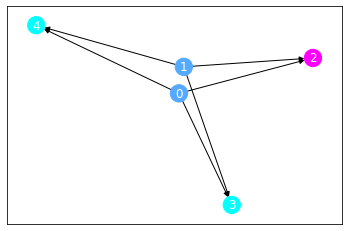

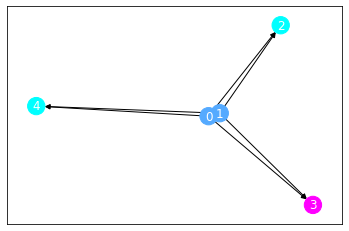

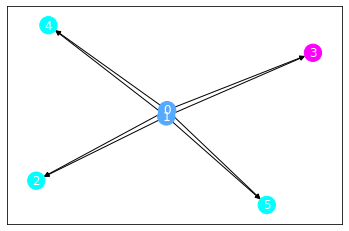

In [3]:
circuit1 = Circuit(2, [0, 1, 0, 1, 0, 1, 2])
circuit1.plot_network()
plt.show()
circuit2 = Circuit(2, [0, 1, 0, 1, 0, 1, 3])
circuit2.plot_network()
plt.show()
circuit3 = Circuit(2, [0, 1, 0, 1, 0, 1, 0, 1, 3])
circuit3.plot_network()
plt.show()

In [4]:
testCounter = IsomorphismCounter()
testCounter.add(circuit1, 3)
testCounter.add(circuit2, 3)
testCounter.add(circuit3, 4)
testCounter.get_number_by_size(3)

{[0, 1, 0, 1, 0, 1, 2]: 2}

Goal Function

In [5]:
def goal_function(x: [bool]) -> bool:
    return x[0] ^ x[1]

Now the actual simulation

4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:46180.0
Mean:60651.11
STD:52974.023505657
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:30192.5
Mean:36560.34
STD:24882.24504791318
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:23254.0
Mean:27471.68
STD:17249.027311637026
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:20600.5
Mean:24477.62
STD:18235.366949299376
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:23240.5
Mean:25431.8
STD:15981.990239641618
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:18854.5
Mean:22302.71
STD:15704.984798015566
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:23872.5
Mean:25987.9
STD:14343.052707495708
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:23821.5
Mean:25722.42
STD:13965.756212378907
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:22270.0
Mean:23120.1
STD:12487.44858127552
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:23172.0
Mean:24953.84
STD:13791.155670008224


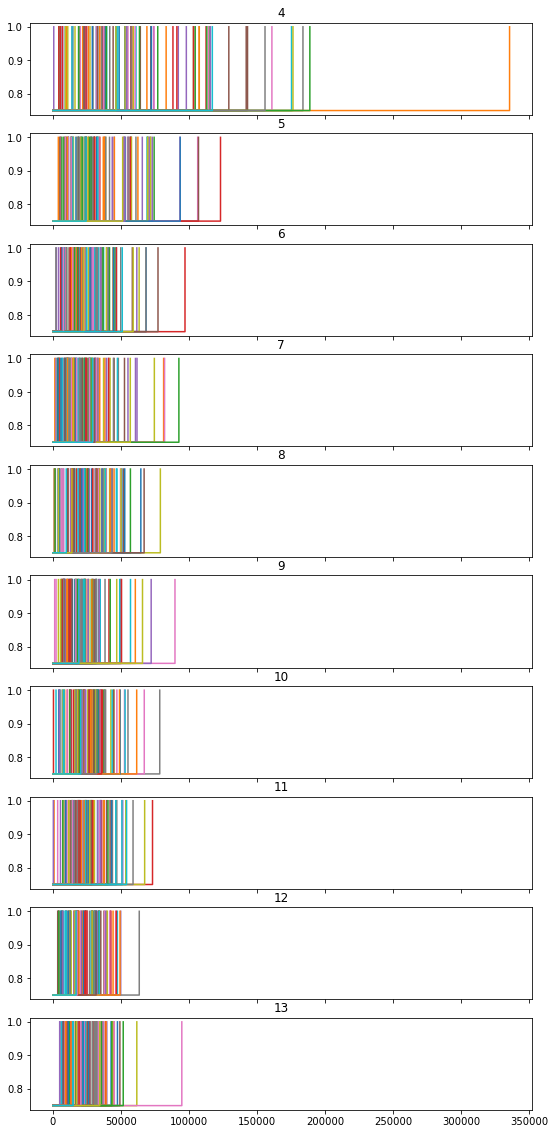

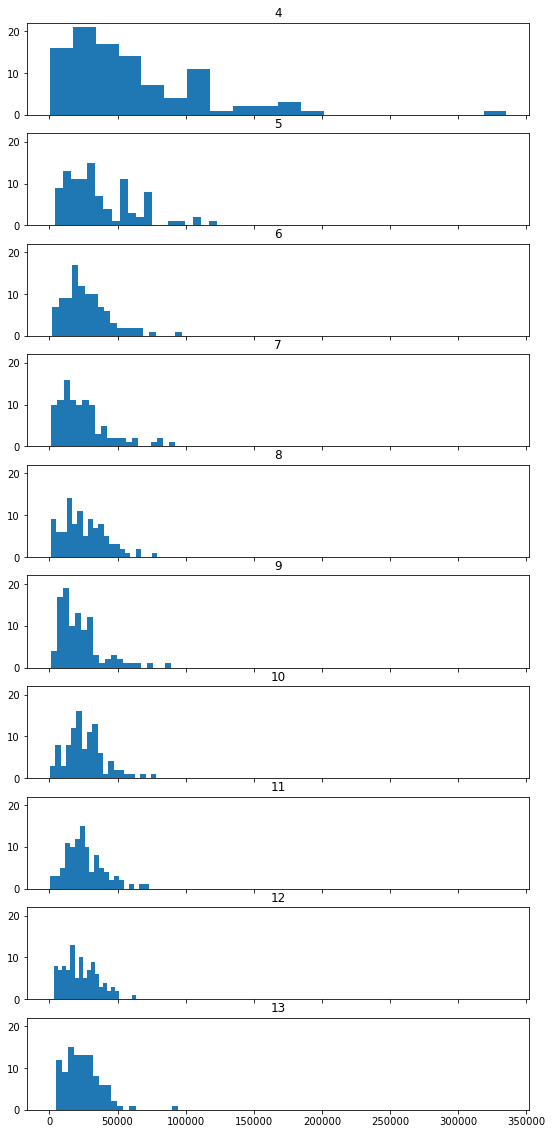

In [6]:
sizes = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_evolution_strong_selection(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

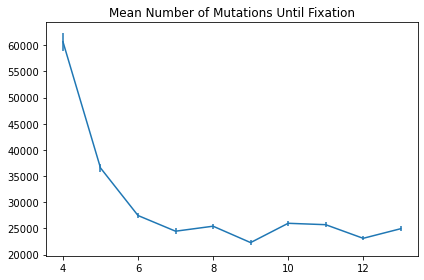

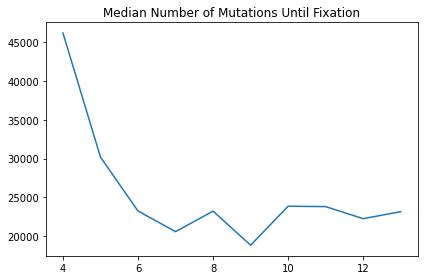

In [7]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 392, 4: 100, 5: 63, 6: 56, 7: 43, 8: 29, 9: 23, 10: 21, 13: 21, 12: 20, 11: 16})


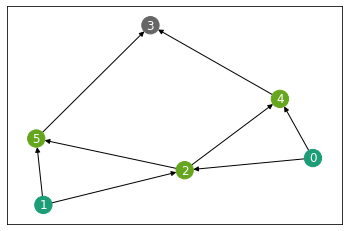

Counter({'total': 50, 5: 9, 9: 8, 6: 7, 7: 6, 8: 6, 13: 5, 10: 4, 12: 3, 11: 2})


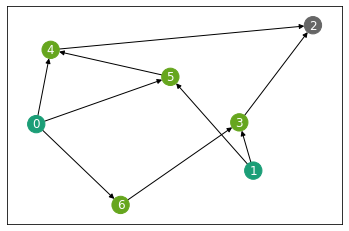

Counter({'total': 34, 5: 7, 6: 5, 9: 5, 8: 4, 12: 4, 7: 3, 10: 3, 13: 2, 11: 1})


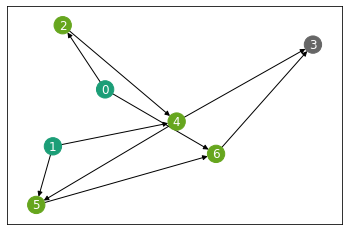

Counter({'total': 73, 5: 13, 6: 12, 7: 12, 11: 12, 8: 8, 9: 7, 10: 4, 13: 3, 12: 2})


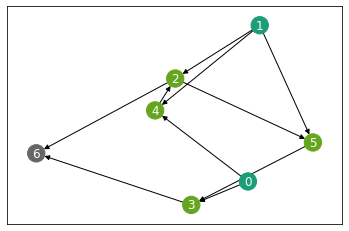

Counter({'total': 113, 11: 19, 13: 17, 12: 16, 9: 15, 10: 13, 8: 10, 7: 9, 5: 7, 6: 7})


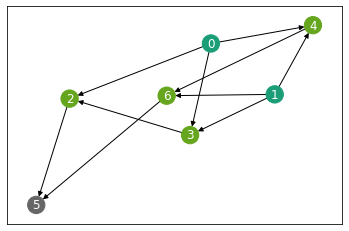

Counter({'total': 7, 6: 3, 5: 1, 7: 1, 8: 1, 11: 1})


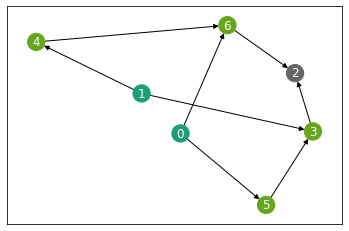

Counter({'total': 7, 8: 2, 12: 2, 6: 1, 7: 1, 10: 1})


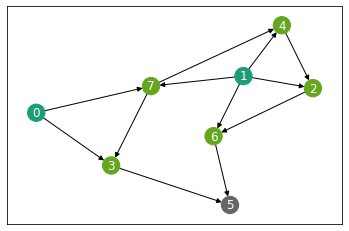

Counter({'total': 7, 9: 2, 11: 2, 6: 1, 8: 1, 10: 1})


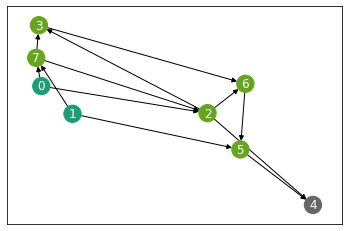

Counter({'total': 7, 10: 2, 6: 1, 7: 1, 8: 1, 9: 1, 11: 1})


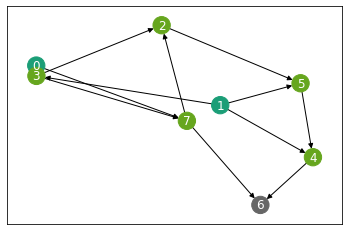

Counter({'total': 5, 9: 3, 7: 1, 12: 1})


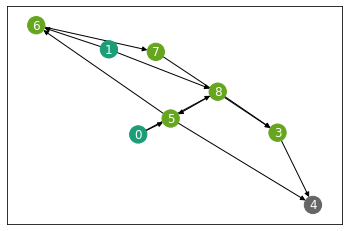

Counter({'total': 10, 7: 3, 11: 2, 12: 2, 8: 1, 10: 1, 13: 1})


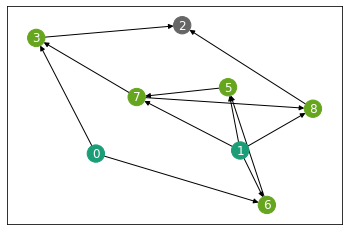

Counter({'total': 7, 10: 3, 9: 2, 8: 1, 13: 1})


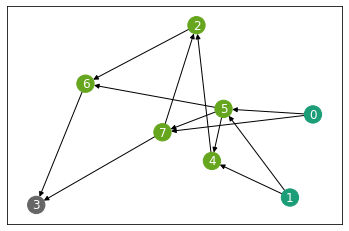

Counter({'total': 5, 9: 2, 13: 2, 12: 1})


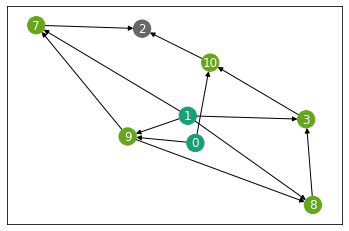

Counter({'total': 5, 10: 2, 9: 1, 12: 1, 13: 1})


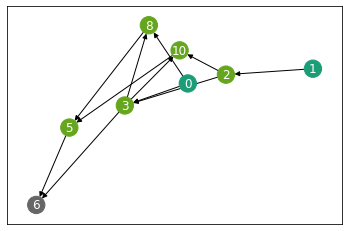

In [8]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [9]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[1, 0, 5, 4, 0, 2, 2, 1, 3],
 [3, 4, 1, 6, 5, 0, 1, 0, 0, 0, 2],
 [0, 0, 4, 6, 2, 1, 1, 4, 0, 5, 3],
 [1, 4, 5, 0, 0, 1, 2, 1, 3, 2, 6],
 [0, 3, 1, 0, 0, 1, 2, 6, 1, 4, 5]]

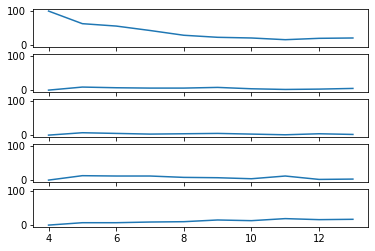

In [17]:
figs, axs = plt.subplots(5, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:5]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [11]:
len(isomorphism_counter.counter)

230

Now to test how unique this behavior is via a random walk

4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:1717.0
Mean:2166.96
STD:2081.181370856466
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:826.5
Mean:1114.19
STD:1109.8066380680916
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:573.0
Mean:922.64
STD:956.904525227047
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:562.0
Mean:765.03
STD:810.4430326062406
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:456.0
Mean:645.15
STD:630.8367043062727
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:424.0
Mean:634.47
STD:606.081718170083
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:343.5
Mean:570.38
STD:564.730728400713
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:387.0
Mean:522.7
STD:497.5923331402927
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:351.0
Mean:598.47
STD:577.3369978617342
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:321.5
Mean:493.38
STD:444.97080308712384


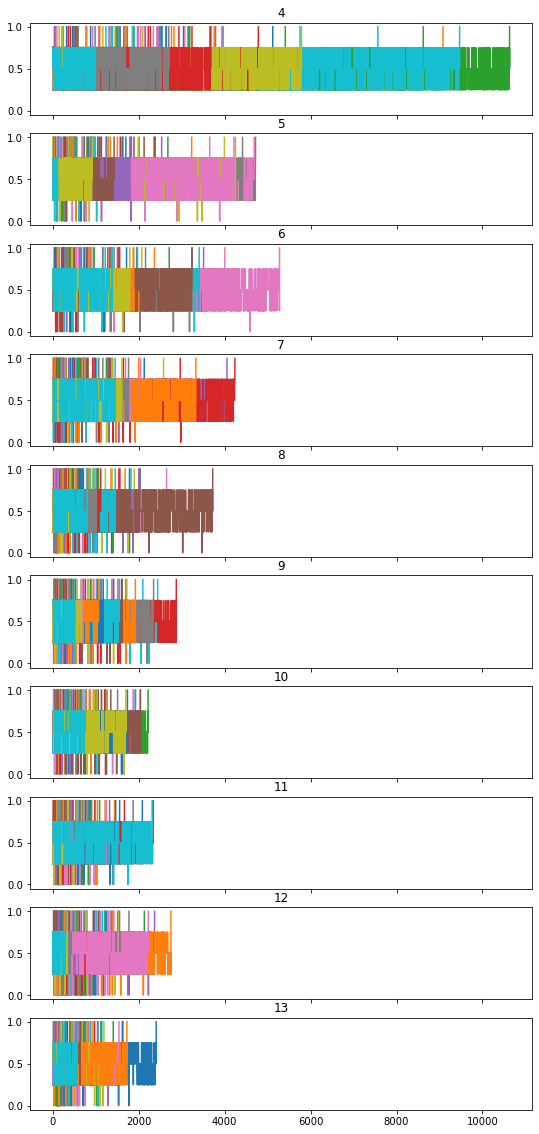

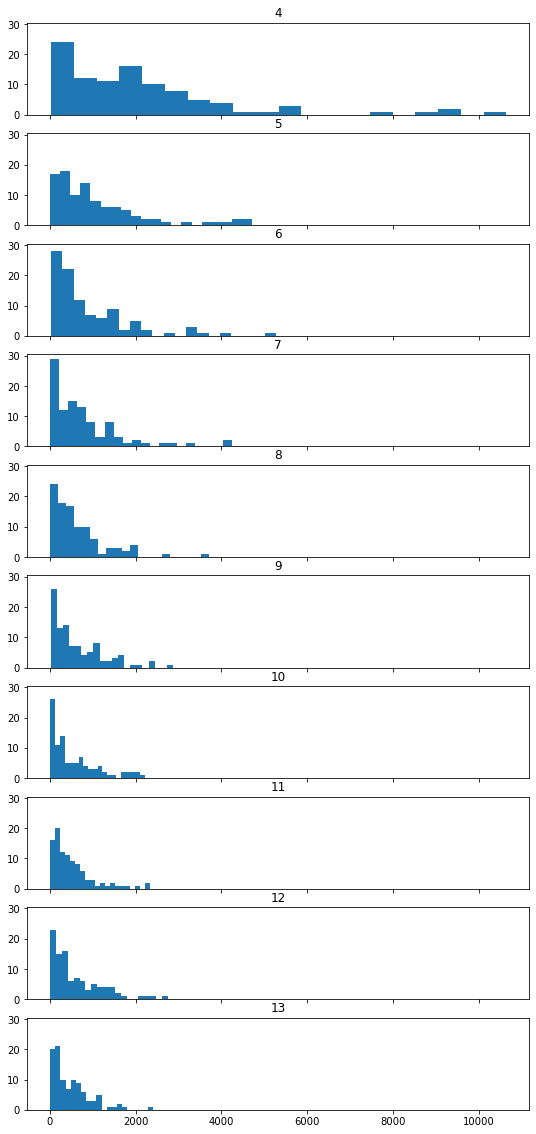

In [12]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

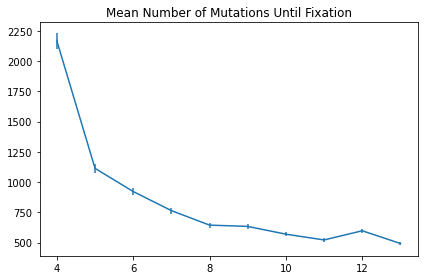

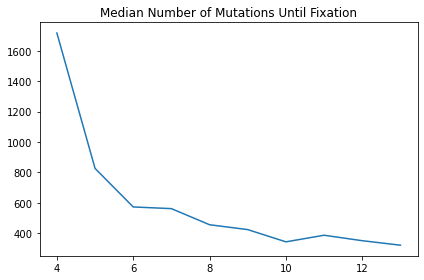

In [13]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Counter({'total': 385, '4 Random Walk': 100, '5 Random Walk': 69, '6 Random Walk': 54, '7 Random Walk': 43, '8 Random Walk': 38, '9 Random Walk': 26, '10 Random Walk': 16, '12 Random Walk': 16, '13 Random Walk': 12, '11 Random Walk': 11})


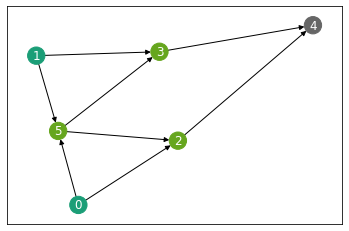

Counter({'total': 36, '5 Random Walk': 8, '9 Random Walk': 6, '6 Random Walk': 4, '7 Random Walk': 4, '10 Random Walk': 4, '13 Random Walk': 4, '8 Random Walk': 3, '11 Random Walk': 2, '12 Random Walk': 1})


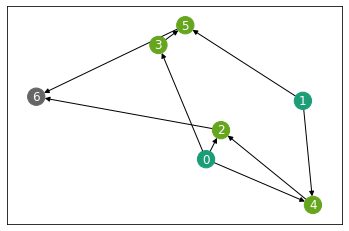

Counter({'total': 42, '6 Random Walk': 9, '8 Random Walk': 7, '5 Random Walk': 6, '7 Random Walk': 5, '11 Random Walk': 4, '9 Random Walk': 3, '10 Random Walk': 3, '12 Random Walk': 3, '13 Random Walk': 2})


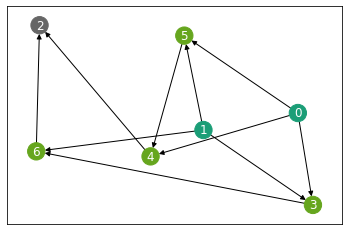

Counter({'total': 6, '5 Random Walk': 3, '6 Random Walk': 1, '7 Random Walk': 1, '11 Random Walk': 1})


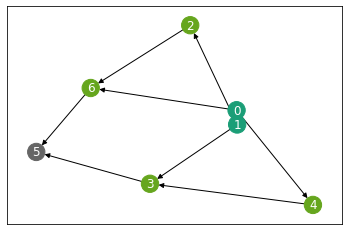

Counter({'total': 69, '6 Random Walk': 12, '5 Random Walk': 10, '8 Random Walk': 10, '7 Random Walk': 9, '9 Random Walk': 8, '11 Random Walk': 6, '13 Random Walk': 6, '10 Random Walk': 5, '12 Random Walk': 3})


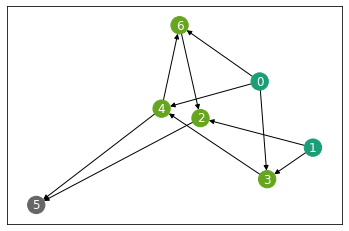

Counter({'total': 26, '6 Random Walk': 7, '7 Random Walk': 5, '5 Random Walk': 4, '8 Random Walk': 4, '11 Random Walk': 2, '9 Random Walk': 1, '10 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


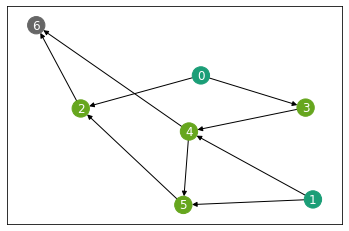

Counter({'total': 6, '11 Random Walk': 3, '6 Random Walk': 1, '9 Random Walk': 1, '13 Random Walk': 1})


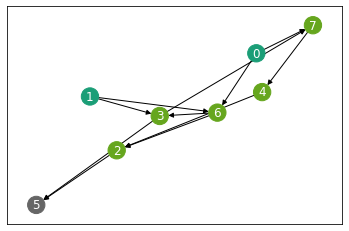

Counter({'total': 7, '6 Random Walk': 4, '7 Random Walk': 1, '8 Random Walk': 1, '10 Random Walk': 1})


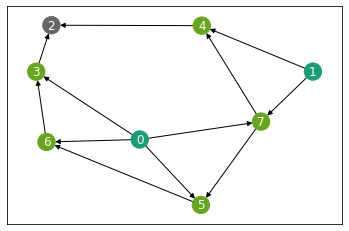

Counter({'total': 7, '11 Random Walk': 3, '6 Random Walk': 1, '7 Random Walk': 1, '8 Random Walk': 1, '9 Random Walk': 1})


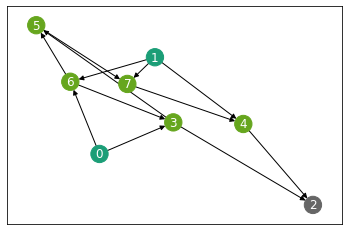

Counter({'total': 9, '8 Random Walk': 2, '9 Random Walk': 2, '6 Random Walk': 1, '7 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1, '13 Random Walk': 1})


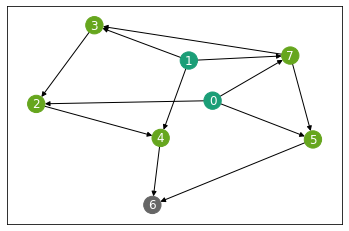

Counter({'total': 6, '7 Random Walk': 4, '10 Random Walk': 1, '11 Random Walk': 1})


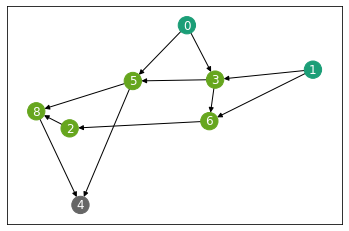

Counter({'total': 6, '8 Random Walk': 2, '12 Random Walk': 2, '7 Random Walk': 1, '11 Random Walk': 1})


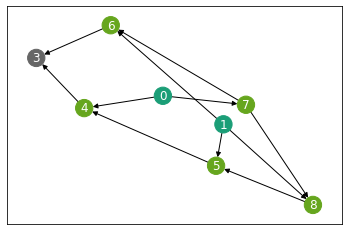

Counter({'total': 8, '7 Random Walk': 4, '9 Random Walk': 2, '11 Random Walk': 1, '13 Random Walk': 1})


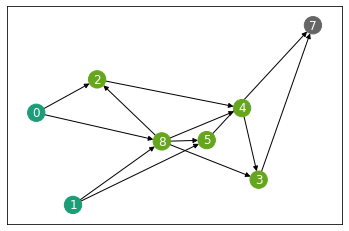

Counter({'total': 5, '12 Random Walk': 2, '7 Random Walk': 1, '8 Random Walk': 1, '11 Random Walk': 1})


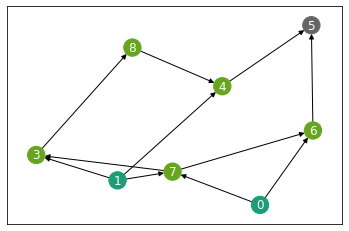

Counter({'total': 5, '11 Random Walk': 2, '13 Random Walk': 2, '7 Random Walk': 1})


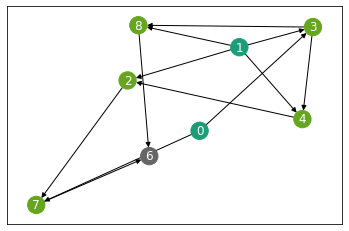

Counter({'total': 5, '7 Random Walk': 2, '10 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1})


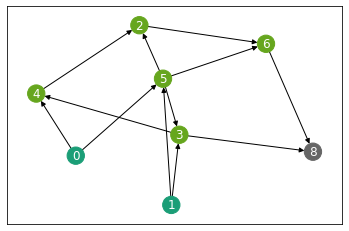

Counter({'total': 5, '10 Random Walk': 2, '8 Random Walk': 1, '9 Random Walk': 1, '12 Random Walk': 1})


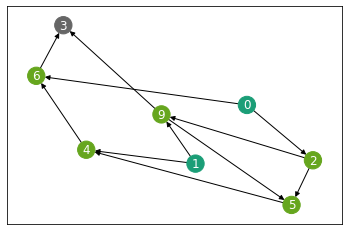

Counter({'total': 5, '8 Random Walk': 1, '9 Random Walk': 1, '10 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


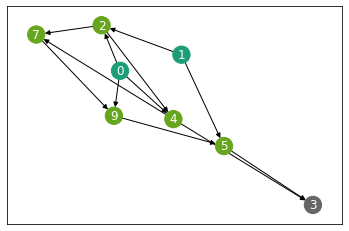

Counter({'total': 5, '8 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


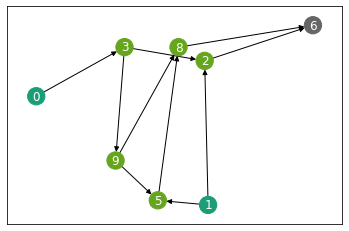

Counter({'total': 5, '8 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


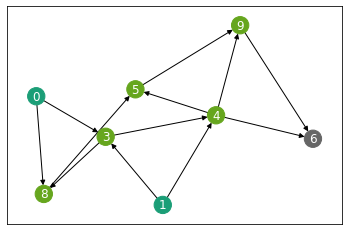

Counter({'total': 5, '10 Random Walk': 3, '8 Random Walk': 1, '11 Random Walk': 1})


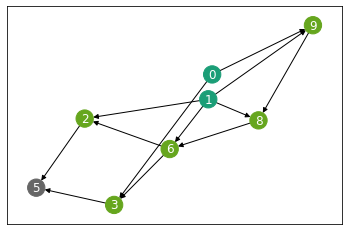

Counter({'total': 6, '9 Random Walk': 2, '13 Random Walk': 2, '10 Random Walk': 1, '11 Random Walk': 1})


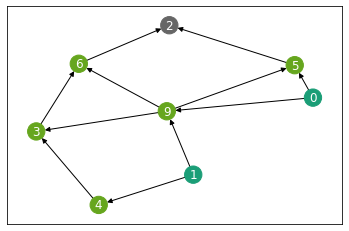

Counter({'total': 5, '9 Random Walk': 1, '10 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


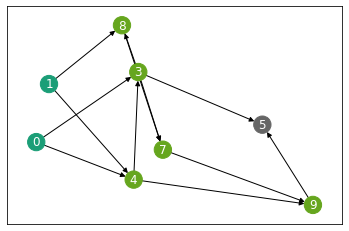

In [14]:
network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [15]:
list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

[[0, 5, 1, 5, 2, 3, 1, 0, 4],
 [4, 0, 0, 0, 0, 1, 1, 3, 2, 5, 6],
 [6, 4, 1, 0, 0, 5, 0, 1, 3, 1, 2],
 [1, 1, 4, 1, 0, 0, 3, 6, 0, 2, 5],
 [6, 1, 0, 1, 0, 3, 2, 4, 4, 0, 5]]

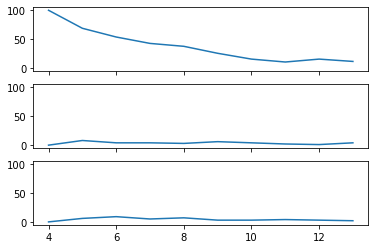

In [16]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])